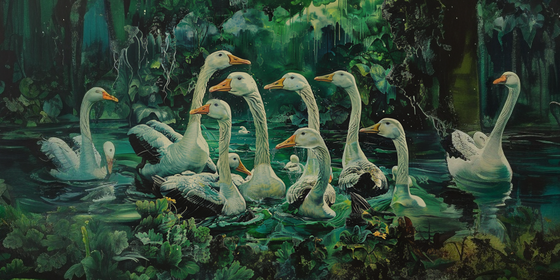

<br>

## Notebook Description

This notebook aims to explore the behavior of the data provided for the [Regression with a Flood Prediction Dataset](https://www.kaggle.com/competitions/playground-series-s4e5) competition. The goal is to gain insights into the dataset's characteristics, understand its features, and prepare it for further analysis and modeling. Throughout the notebook, we'll examine the distribution of variables, identify any patterns or anomalies, and perform necessary preprocessing steps to ensure the data is ready for predictive modeling tasks.


### Steps

1. **Load Data:** Begin by loading the dataset into the notebook environment.
2. **General Info:** Explore general information about the dataset, such as its shape, data types, and summary statistics.
3. **Boxplot (Outlier Detection):** Utilize boxplots to identify and visualize outliers within the dataset, helping to detect any extreme values or anomalies.
4. **Kernel Density Estimation (KDE):** Assess the distribution of variables using Kernel Density Estimation (KDE) plots, which can reveal insights into the underlying distribution of data, including potential Gaussian distributions.
5. **fasetda:** A quick way to overview a DataFrame.


### Packages
Install the following packages in Python prior to running the code.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Ignore all user warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignore all future warnings

In [2]:
# fasteda
!pip install --quiet fasteda

## Load
Load **TRAIN** data

In [3]:
# Set paths
PATH_TRAIN = '/kaggle/input/playground-series-s4e5/train.csv'
PATH_TEST = None
PATH_SAMPLE = None
TARGET = 'FloodProbability'

DATA_LOAD = pd.read_csv(PATH_TRAIN, index_col='id')
DATA_LOAD.head(2).T

id,0,1
MonsoonIntensity,5.000,6.00
TopographyDrainage,8.000,7.00
RiverManagement,5.000,4.00
Deforestation,8.000,4.00
Urbanization,6.000,8.00
ClimateChange,4.000,8.00
DamsQuality,4.000,3.00
Siltation,3.000,5.00
AgriculturalPractices,3.000,4.00
Encroachments,4.000,6.00


## Boxplot

The Boxplot, also known as a box-and-whisker plot, is a graphical representation that allows you to visualize the distribution and spread of data for a variable using quartiles.

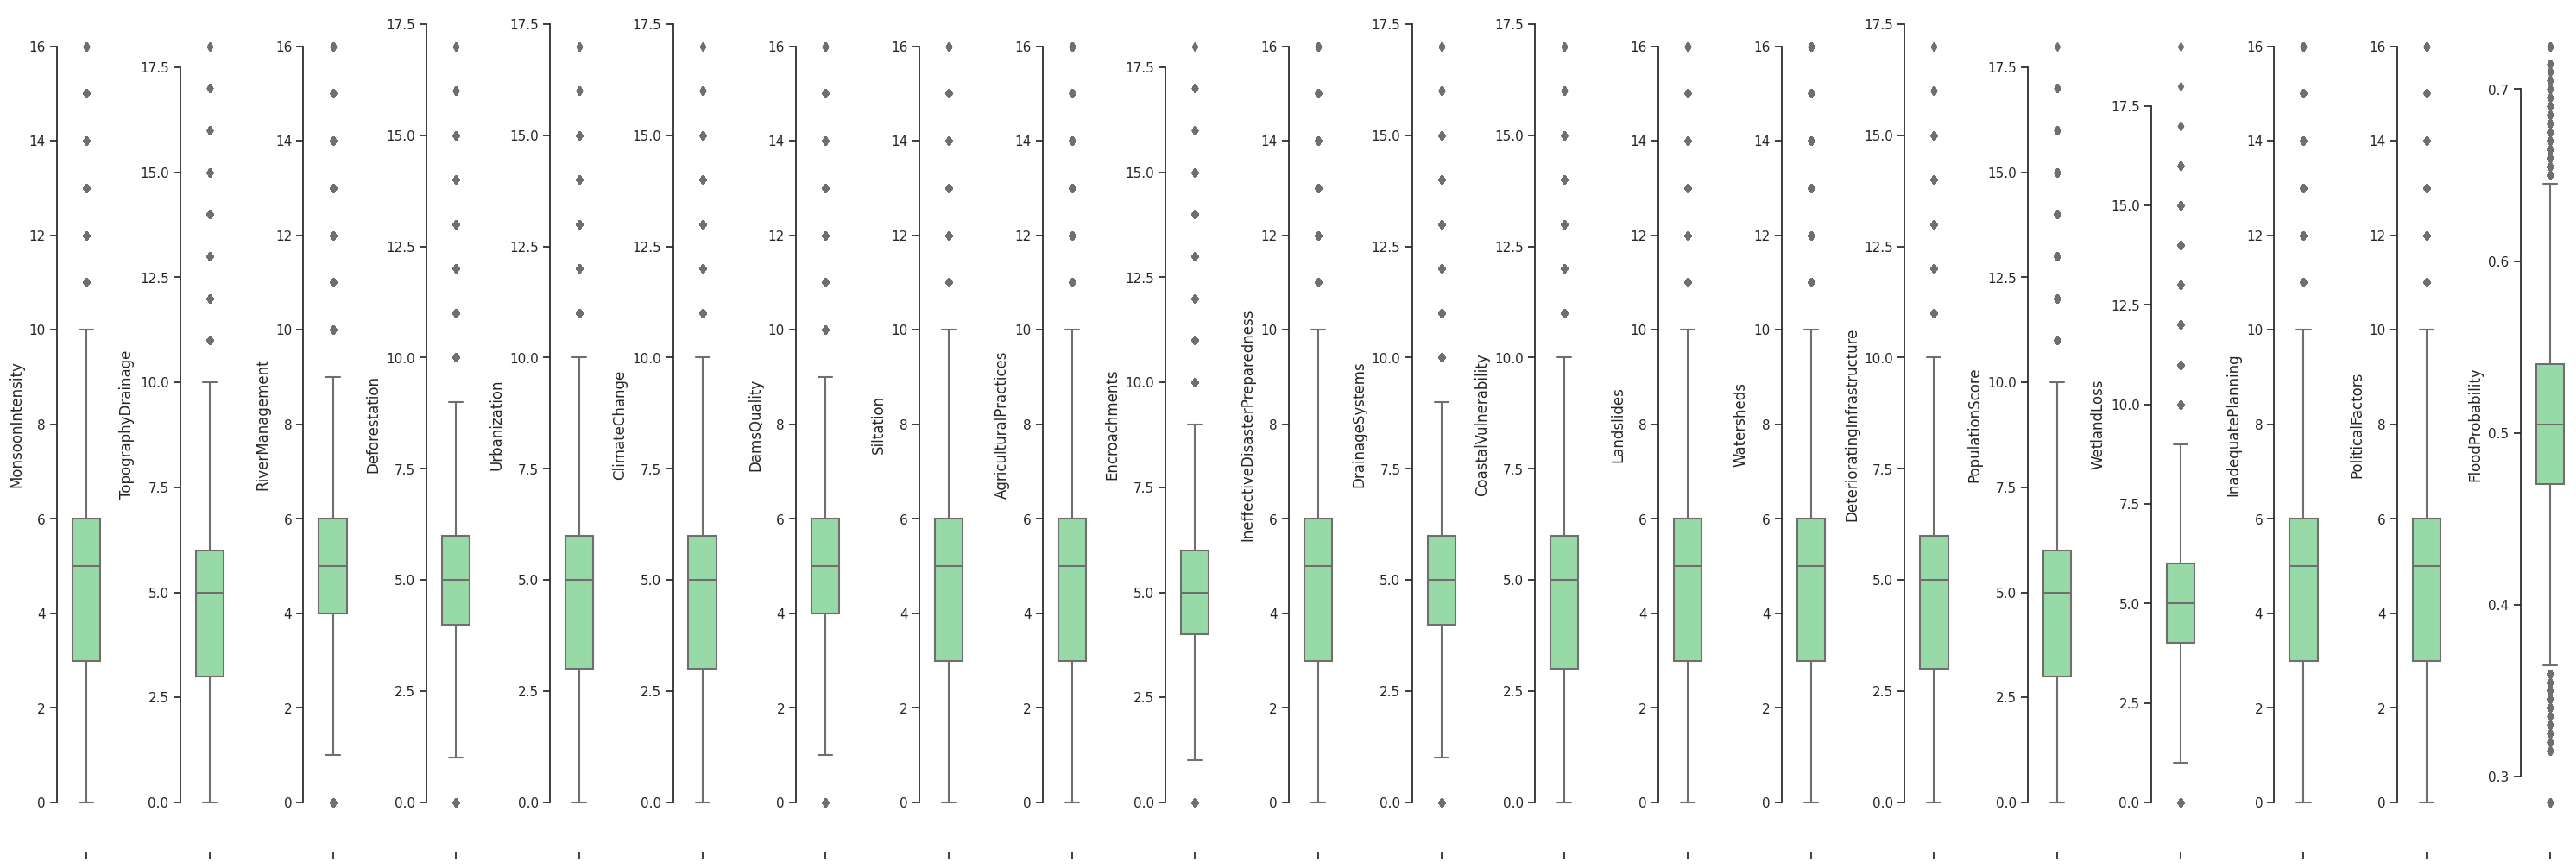

In [4]:
def box_plot(data):
    '''
    This function plots a boxplot for each column
    in the dataframe.
    
    Args:
    data - DataFrame
    '''
    # Setting the Seaborn theme and palette
    sns.set_theme(style="ticks", palette="pastel")
    
    # Create a single figure for all boxplots
    fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(30, 10), dpi=100)
    
    # Iterating over each column in the dataframe
    for i, col in enumerate(data.columns):
        # Creating a boxplot for the current column
        sns.boxplot(y=data[col], palette=["g"], ax=axes[i])
        
        # Removing top and right spines, and trimming
        sns.despine(offset=10, trim=True, ax=axes[i])
        
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Calling the function to plot boxplots for each column in the dataframe
box_plot(DATA_LOAD)

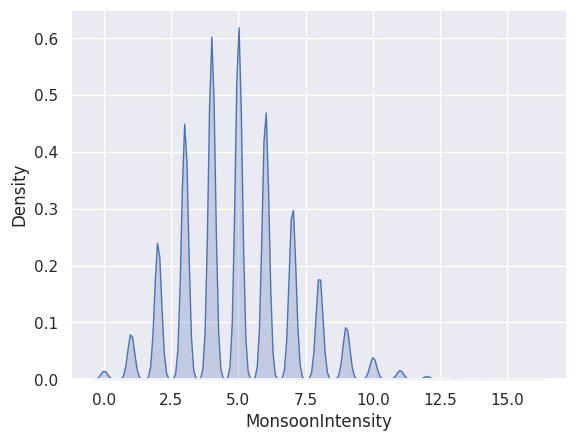

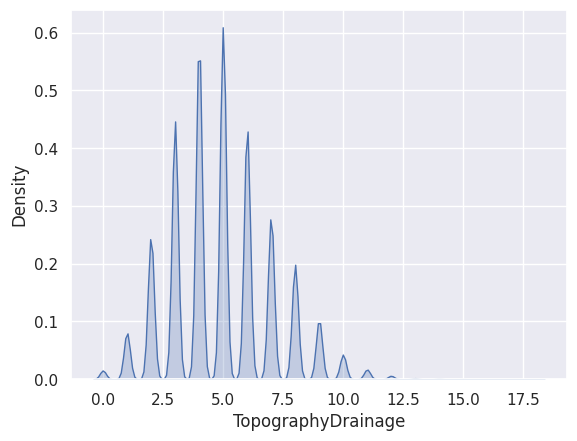

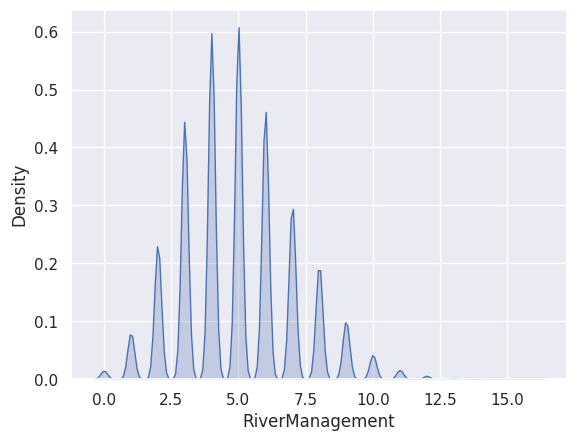

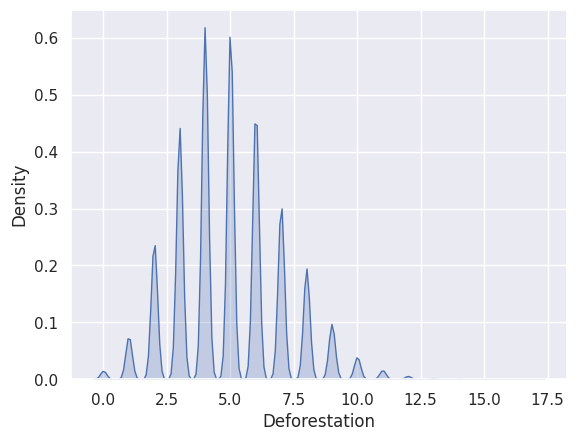

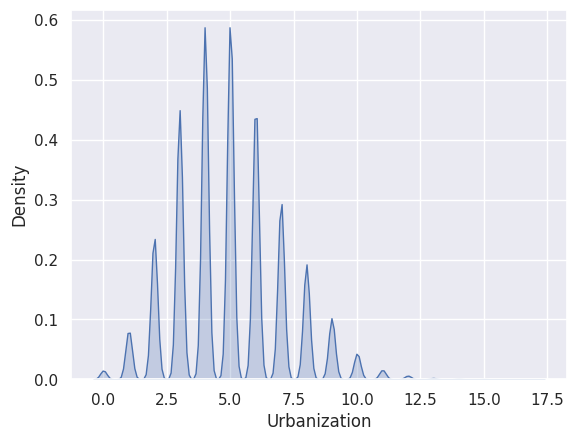

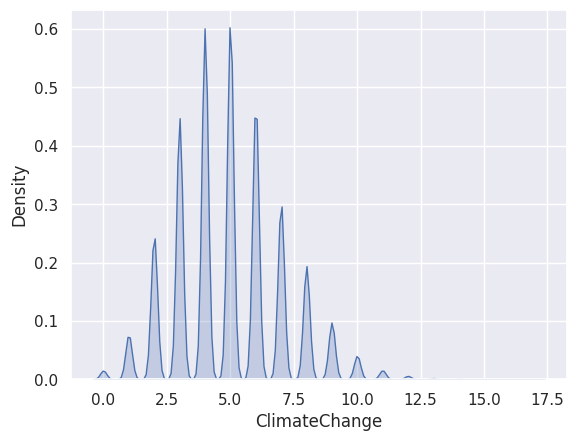

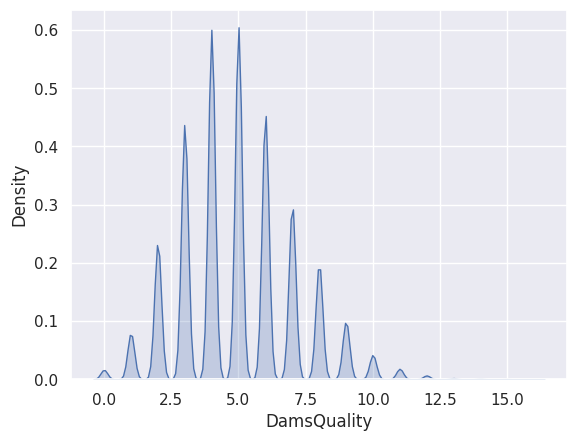

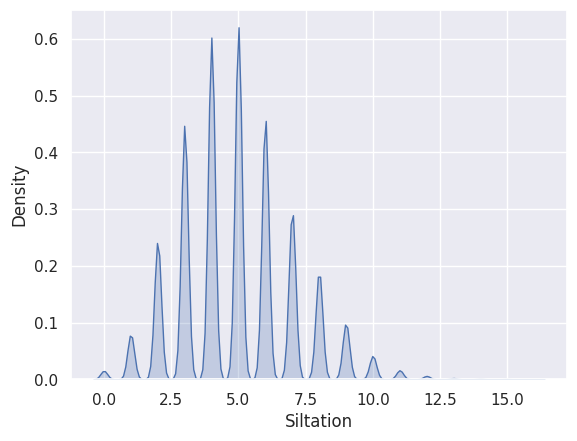

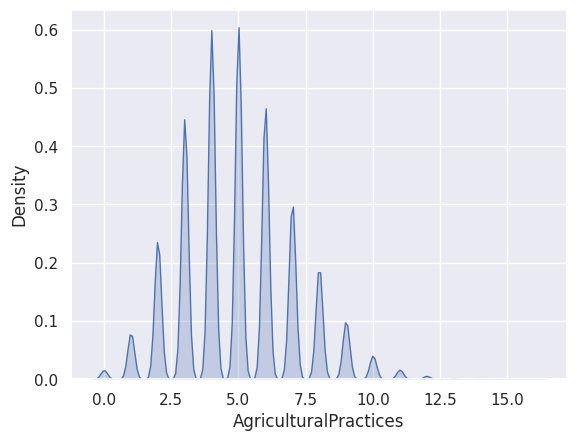

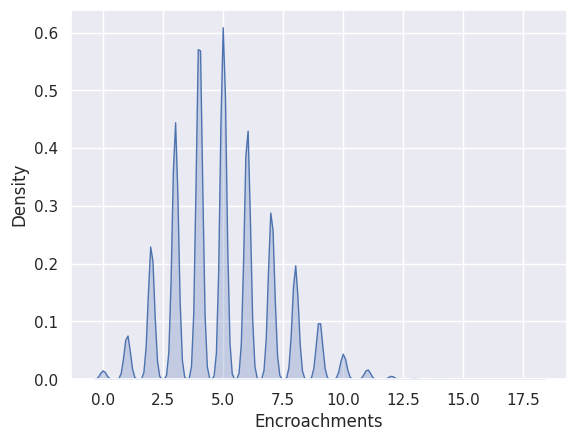

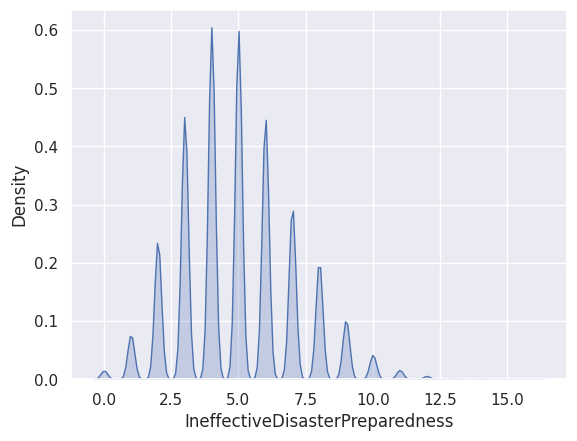

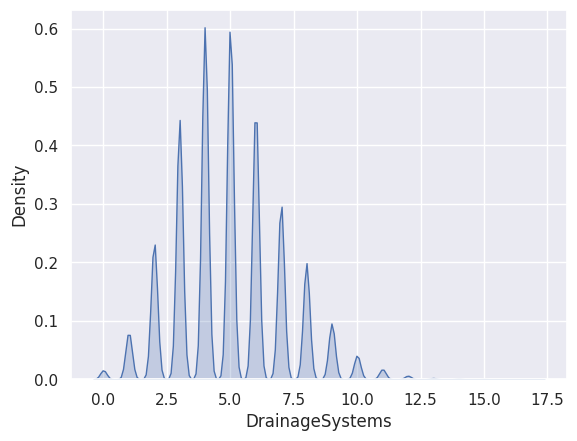

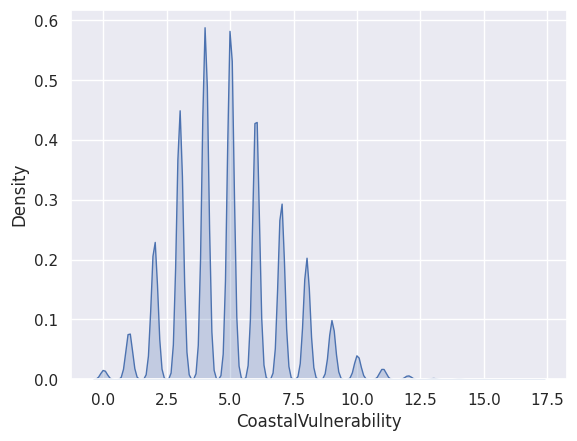

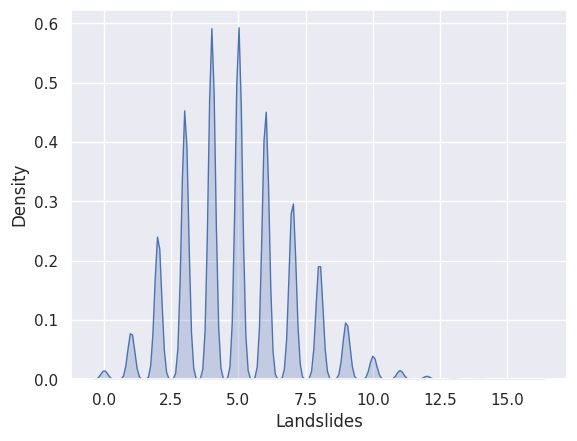

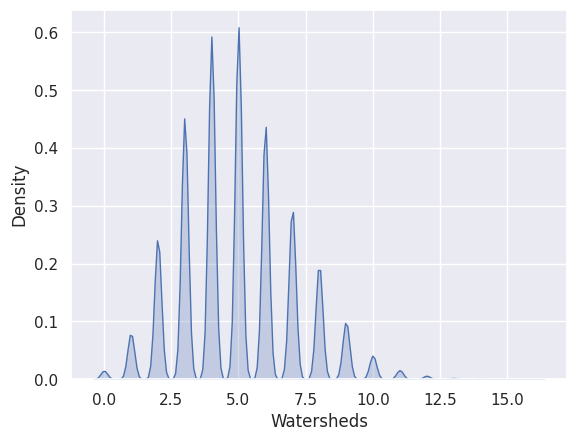

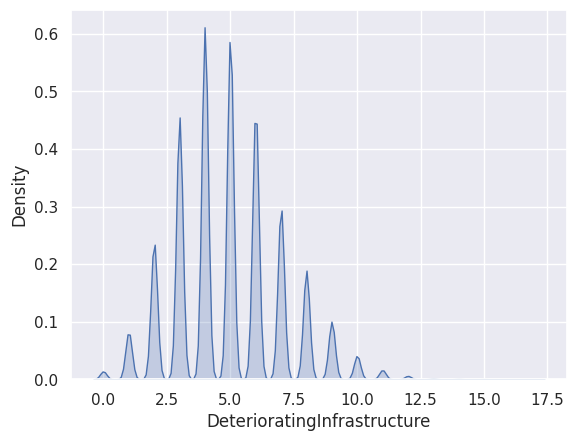

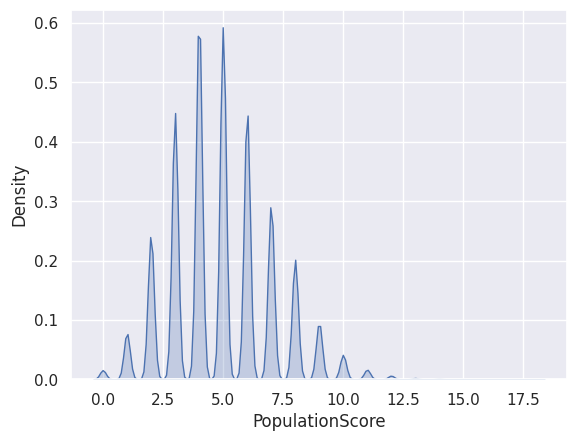

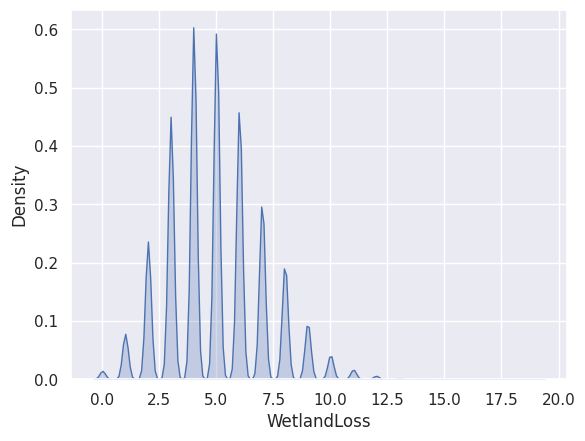

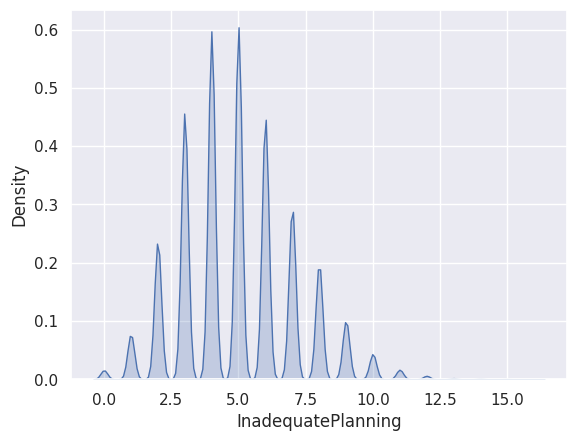

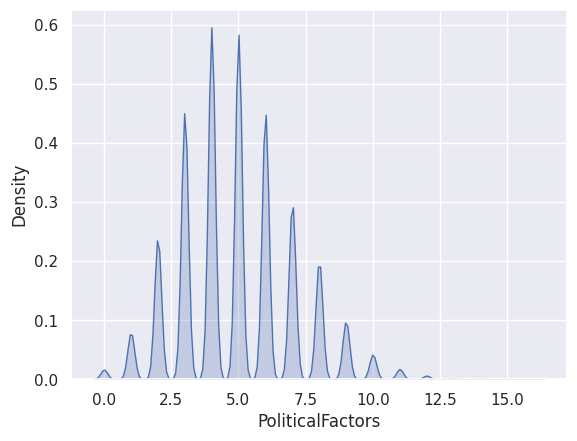

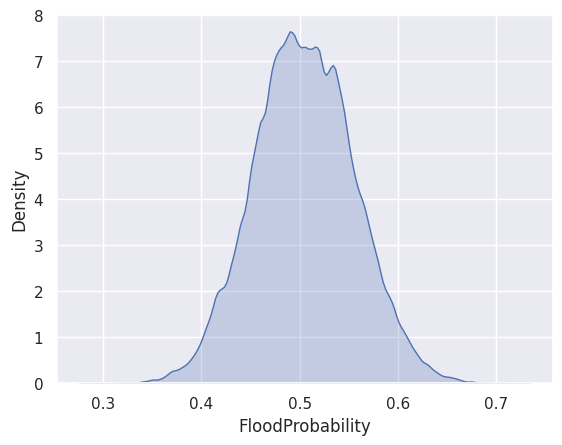

In [5]:
def kde_plot(data):
    '''
    This function plots KDE (kernel density estimation) plots for
    each column of the dataframe.
    
    Args:
    data - DataFrame
    cols - Columns of the dataframe
    '''
    # Set Seaborn theme and style
    sns.set_theme(style="darkgrid")
    
    # Generate KDE plots for each column
    for col in(data.columns):
        # Draw KDE plot for the current column
        sns.kdeplot(data=data[col], fill=True)
        
        # Show all plots
        plt.show()

# Call the function to plot KDE plots for all columns
kde_plot(DATA_LOAD)

## fasteda
A python module that provides a quick way to overview a DataFrame.

DataFrame Head:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530


DataFrame Tail:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
1117954,7,3,9,4,6,5,9,1,3,4,5,5,5,5,5,6,5,5,2,4,0.485
1117955,7,3,3,7,5,2,3,4,6,4,6,6,8,5,3,4,6,7,6,4,0.495
1117956,4,5,6,9,5,5,2,8,4,5,1,4,8,6,5,5,6,7,7,8,0.560


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(1117957, 21)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Index: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
MonsoonIntensity,1117957,4.921,5,2.056,0,3,5,6,16,0.444528,0.341222
TopographyDrainage,1117957,4.927,5,2.094,0,3,5,6,18,0.458728,0.238345
RiverManagement,1117957,4.955,5,2.072,0,4,5,6,16,0.426491,0.224161
Deforestation,1117957,4.942,5,2.052,0,4,5,6,17,0.434314,0.275103
Urbanization,1117957,4.943,5,2.083,0,3,5,6,17,0.442167,0.248272
ClimateChange,1117957,4.934,5,2.058,0,3,5,6,17,0.429403,0.241259
DamsQuality,1117957,4.956,5,2.083,0,4,5,6,16,0.441402,0.262068
Siltation,1117957,4.928,5,2.066,0,3,5,6,16,0.449247,0.287093
AgriculturalPractices,1117957,4.943,5,2.069,0,3,5,6,16,0.421144,0.214090
Encroachments,1117957,4.949,5,2.083,0,4,5,6,18,0.463550,0.266593


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



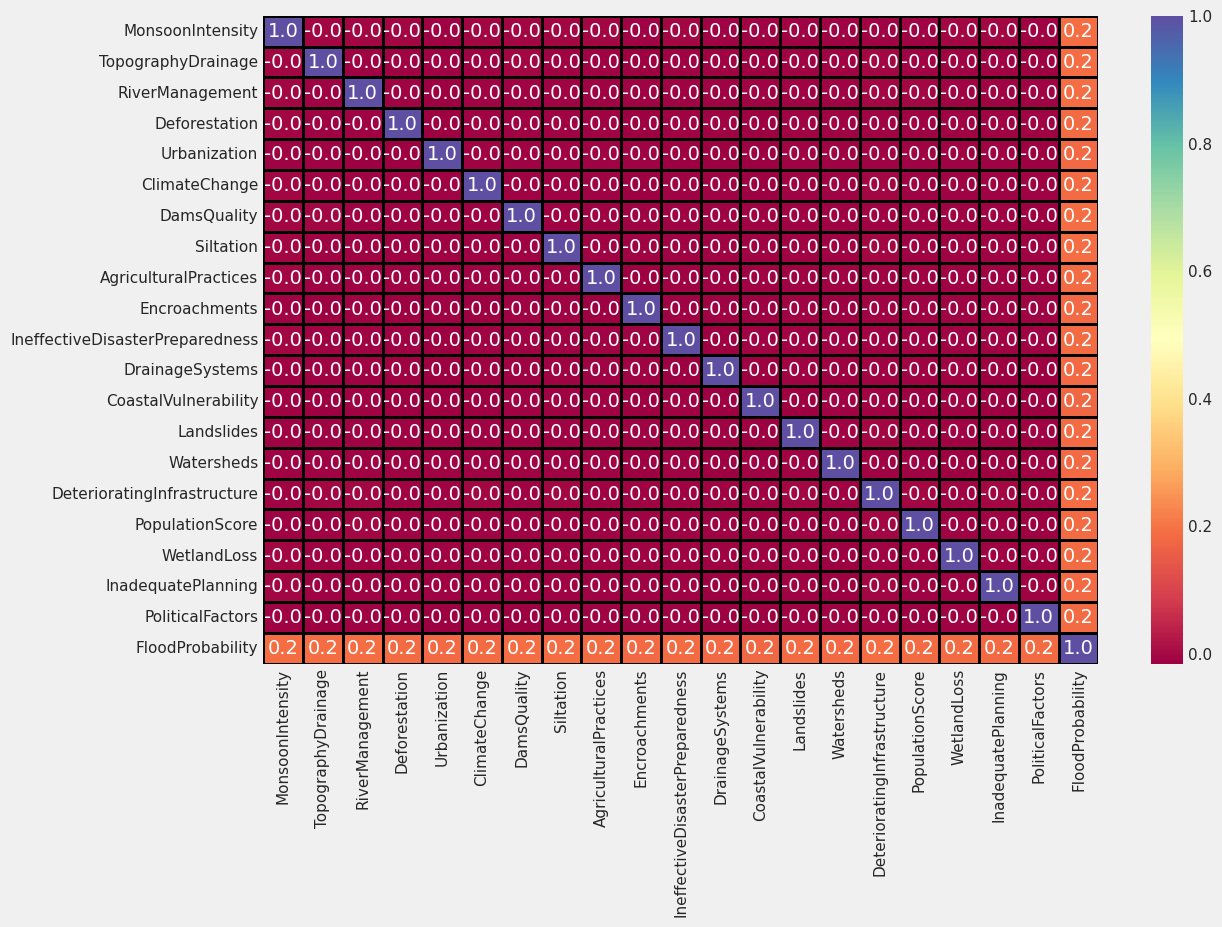

In [6]:
from fasteda import fast_eda

fast_eda(DATA_LOAD, target=TARGET, correlation=True, pairplot=True, hist_box_plot=False, countplot=False)

## Acknowledgements
[Matt-OP/fasteda](https://github.com/Matt-OP/fasteda)